<div align="center"><h1>Control Engineering Basics</h1>
<br><b>Dr.Varodom Toochinda</b>
<br>Dept. of Mechanical Engineering, Kasetsart University</div>

<a href="https://colab.research.google.com/github/dewdotninja/control_python/blob/master/ceb_m3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 3: Classical Loopshaping Design

<b>Requirement : </b> Python 3 with Python control systems library
<p />Execute the commands below to install Python control systems library in Colab    


In [ ]:
!pip install slycot

In [ ]:
!pip install control

This article is contained in Control Engineering Basics study module, which is used as course material for Electrical-Mechanical Manufacturing Engineering (EMME), Department of Mechanical Engineering, Kasetsart University.

### Module Key Study Points
* Understand the tradeoffs in feedback control design
* Learn how to formulate design specs as bounds on frequency responses
* Relationships between open-loop and closed-loop frequency responses
* Perform basic frequency response shaping of loop transfer function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

<p />Recall from module 2, we define 3 important transfer functions 

<em>Loop :</em>
\begin{equation} 
L(s) = C(s)P(s)
\end{equation}
<div align="right">(1)</div>

<em>Sensitivity :</em>
\begin{equation} 
S(s) = \frac{1}{1+L(s)}  
\end{equation}
<div align="right">(2)</div>

<em>Complementary Sensitivity :</em>
\begin{equation} 
T(s) = \frac{L(s)}{1+L(s)}  
\end{equation}
<div align="right">(3)</div>

<p />that become the key players, especially for an approach of feedback control design commonly 
known as “classical control,” since it originated from the ’40 during WWII. This study module focuses 
on such approach. In essence, we will perform frequency response shaping on the loop transfer function
$L(s)$ to yield the desired control specifications, often referred to as 
<em>loopshaping</em>*. 
<p />* We have to make a remark though, that this term is also used in some modern design scheme 
to shape the closed-loop frequency responses directly. In this module we focus on shaping the 
open-loop transfer function $L(s)$.
<p />Before getting into the design procedure, we need to formulate the stability and performance 
requirements from last module to a general SISO feedback diagram with exogenous signals injected at 
various points in the loop, as shown in Figure 1. 

<p align="center">
<img src="https://drive.google.com/uc?id=1YWuARSII-fDBXkWGaSHdMBprOM81tHlf" width=600 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 a general SISO feedback diagram</b></div>

<h3>Performance Criteria</h3>

<p />The following closed-loop responses can be easily derived

\begin{equation}
y(s) = S(s)d_o(s) + T(s)(r(s) - n(s)) - S(s)P(s)d_i(s)  
\end{equation}
<div align="right">(4)</div>

\begin{equation}
e(s) = S(s)(r(s) - n(s) - d_o(s) - P(s)d_i(s))  
\end{equation}
<div align="right">(5)</div>

\begin{equation}
u(s) = C(s)S(s)(r(s) - n(s) -d_o(s)) + T(s)d_i(s)
\end{equation}
<div align="right">(6)</div>

<p />Together with the plant, the transfer functions that play the roles in these expressions are the 
sensitivity $S(s)$ and complementary sensitivity $T(s)$. Note that these two closed-loop transfer 
functions are functions of the controller, so design criteria can be casted on them. 

<p />For example, good tracking performance requires that $e(s)$ approaches zero. From (5), 
it implies that $S(s)$ should be made small. Now, suppose that measurement noise $n(s)$ is prevalent 
in this system. We do not want this unwanted signal to affect the plant output $y(s)$. From (4), 
this noise rejection requirement implies that $T(s)$ should be made small. So, we must design a 
controller to yield small $S(s)$ and $T(s)$. But this requirement violates the algebraic constraint

\begin{equation} 
S(s) + T(s) = 1 
\end{equation}
<div align="right">(7)</div>

<p />i.e., when $S(s)$ approaches 0, $T(s)$ goes to 1, and vice versa. This conflict suggests that 
some tradeoffs have to be made in the control design specifications. 

<p />Fortunately, in normal situation the exogenous signals entering the feedback loop in Figure 1 
have different frequency spectrum that could ease off the problem considerably. We summarize them as 
follows:
<ul>
<li>$r$ (command input): common command signal is smooth and varies gradually with time, so it 
    naturally lies in low-frequency region. </li>
<li>$d_i, d_o$ (disturbance): a typical disturbance signal entering at the input or output of 
    the plant also has low-frequency spectrum, such as mechanical vibration, resonance, or in the 
    robot joint case, the dynamic force exerting from adjacent links. </li>
<li>$n$ (measurement noise): most sensors become noisy when frequency increases. So the measurement 
    noise generally lies in high-frequency region. </li>
</ul>

This allows us to cast frequency-dependent specifications to $S(s)$ and $T(s)$. It is more 
convenient to represent them as magnitude of frequency responses $|S(j\omega)|$ and $|T(j\omega)|$. 
So, in the above situation, we can make $|S(j\omega)|$ small in low frequency region (for good 
tracking), and $|T(j\omega)|$ small in high frequency region (noise rejection).   

<h3>Stability Criteria</h3>

<b>Note: </b> in the discussion that follows, we assume a stable, minimum-phase plant, such as the 
    DC motor robot joint used as our example.  Some statements may not be valid for an unstable or 
    non-minimum phase plant. 
<p />Stability requirement for classical control design can be explained clearly using relationship 
between the magnitude of sensitivity $|S(j\omega)|$  and Nyquist plot of $L(j\omega)$ as shown in
Figure 2. It can be shown that the distance from $L(j\omega)$ curve to the critical point -1 is
inversely proportional to  $|S(j\omega)|$. The shorter this distance, the poorer stability margin 
of the system.  The circle in Figure 2 represents the magnitude  $|S(j\omega)|= 1$.  Hence, when 
$|S(j\omega)| > 1$, the curve of $L(j\omega)$ is inside the circle. As a result, control design 
spec for stability can be made as a bound on the peak of sensitivity frequency response. Note that 
this peak occurs at some mid frequency region before $|S(j\omega)|$ converges to 1 and  $|T(j\omega)|$ roll-off. 

<p align="center">
<img src="https://drive.google.com/uc?id=1aDLBFrVY_xQRrK-5hH775DKledrTInXF" width=400 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 relationship between sensitivity frequency response and Nyquist plot</b></div>

<h3>Design Criteria Imposed on Loop Transfer Function
  </h3>
<p />In some postmodern control strategy such as $H_\infty$ synthesis, the stability and performance
bounds discussed above can be formulated into weighting functions on $S$ and $T$ directly. 
That strategy is also called loopshaping (on closed-loop transfer functions). For the classical 
control design scheme, however, the frequency response shaping is performed on the loop transfer
function $L(s)$. Hence, all the criteria must be converted to bounds on $L$.
<p /> To summarize the stability and performance criteria on the closed-loop transfer functions,
we separate them to 3 frequency regions LOW, MID, and HIGH. From the above discussion, we have the 
following design specs
<ul>
<li> <b> LOW: </b>$|S(j\omega)| \ll 1$ for good tracking and disturbance attenuation </li>
<li> <b> MID: </b>since $|S(j\omega)| \gg 1$   indicates poor stability. An upper bound on
    $|S(j\omega)|$  is needed. Note from the algebraic constraint that $|S(j\omega)| \gg 1$  
    implies $|T(j\omega)| \gg 1$ .
 </li>
<li> <b> HIGH: </b> $|T(j\omega)| \ll 1$  for measurement noise rejection performance.</li>
</ul>

<p />Now, these closed-loop bounds can be converted to constraints on $L(j\omega)$ by using these 
relationships
<ul>
<li> <b> LOW:</b> for small $S(j\omega)$,  we have 
    $S(j\omega) = \frac{1}{1 + L(j\omega)} \approx \frac{1}{L(j\omega)}$.  
    Hence $|S(j\omega)| \ll 1$   implies $|L(j\omega)| \gg 1$; i.e., the bound on $L$ is 
    created by inverting the bound on $S$.</li>
<li> <b> MID: </b> By means of Figure 2, the bound on $S$ is translated to stability margins 
    criteria on $L$. For a stable, minimum phase plant, Bode gain-phase relationship is normally
    used in shaping $L(j\omega)$ in MID frequency to have sufficient phase margin. More on 
    this later.
</li>
<li> <b> HIGH: </b>for small $T(j\omega)$,  we have 
    $T(j\omega) = \frac{L(j\omega)}{1 + L(j\omega)} \approx L(j\omega)$ . 
    Hence $|T(j\omega)| \ll 1$   implies $|L(j\omega)| \ll 1$; i.e., the bound on $L$ is the
    same as the bound on $T$.
 </li>
</ul>

<p />This can be summarized in Figure 3 and 4. 

<p align="center">
<img src="https://drive.google.com/uc?id=1BNs8L433DjsCjJX8fUO1YWiSE9Ajq4kq" width=500 alt="Figure 3"/>
</p>
<div align="center"><b>Figure 3 bounds on S and T</b></div>

<p align="center">
<img src="https://drive.google.com/uc?id=1nyfOkBoveSv5-j4FxvpsyghgfbwMVTox" width=500 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 4 bounds on L</b></div>



<h3>Bode Gain-Phase Relationship</h3>
<p />The stability requirement on $L(j\omega)$ in Figure 4 may need more explanation. Suppose there 
is no stability requirement in terms of phase margin, we could make the magnitude of L to have its 
slope as steep as we want to easily satisfy both the low and high frequency bounds. Such simplicity 
is not feasible due to a constraint at the crossover frequency known as the Bode gain-phase 
relationship, which states that
<p /><em>For a stable, minimum-phase system, the phase of any transfer function $L(j\omega)$ has 
a unique relationship with its magnitude. On a log-log plot, if the slope of magnitude plot has a 
constant slope n over a decade of frequency, then </em>

\begin{equation} 
\angle L(j\omega) \approx n \times 90^\circ
\end{equation}
<div align="right">(8)</div>

<p />This suggests a basic rule for stability of classical control design. For the closed loop 
system to have sufficient phase margin, within some frequency region around crossover, the slope 
of  $|L(j\omega)|$ must be approximately -1, or -20 dB/decade. This is depicted in Figure 4.   
may have higher slope in low and high frequency regions to satisfy the performance bounds, but at 
crossover it should try to maintain -20 dB/decade for  some frequency band. 

<p />Now I hope the reader could grab the concept. No better way to understand classical control 
design than experimenting with a problem set.

<p />Before you do that, it is helpful to review your knowledge on how Bode plot changes with 
respect to gain, zero and pole locations. Use this cell to play around with it before getting into
the example that follows.

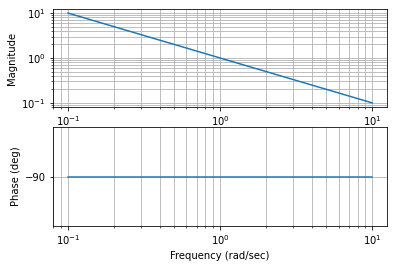

In [22]:
s = ctl.tf('s')
H = 1/s
_,_,_ = ctl.bode_plot(H)

<b> Example: </b> let us design a controller for our same old robot joint driven by DC motor 
    developed since the first module
\begin{equation} 
P(s) = \frac{1}{10s^2 + 0.1s}
\end{equation}
<div align="right">(9)</div>

with the following design specs
<ol>
<li> steady state error is eliminated </li>
<li> low frequency output disturbance is attenuated at least 0.01 below 1 rad/s </li>
<li> high frequency measurement noise is attenuated 0.1 above 100 rad/s </li>
<li> closed-loop stable, with phase margin at least 40 degrees </li>
</ol>

<p />From the above discussion, this can be translated to stability and performance bounds

<ol>
<li> $L(s)$ has an integrator. Note that $P(s)$ already has one</li>
<li> $|S(j\omega)| \leq -40 dB \rightarrow |L(j\omega)| \geq 40 dB$ below 1 rad/s</li>
<li> $|T(j\omega)| \leq 20 dB \rightarrow |L(j\omega)| \leq 20 dB$ above 100 rad/s</li>
<li> $L(j\omega)$ has at least 40 degrees phase margin, or $max|S(j\omega)|\leq 3.3 dB$<b>*</b></li>
</ol>

<p /> <b>*</b>Problem 1 at the end of this notebook asks you to derive this relationship

<p />To aid this design problem, we write a function lshape() in the cell below. 


In [133]:
def lshape(C,P, lf, lfb, hf, hfb, pm ):
    assert lf > 0   # avoid bad values
    assert lfb > 0
    assert hf > lf
    assert hfb < 0
    assert 0 < pm < 90
    L = C*P # form loop transfer function
    # create a suitable range of frequency from lf, hf
    lf_log10 = np.log10(lf)
    w_start = np.floor(lf_log10)-1
    hf_log10 = np.log10(hf)
    w_end = np.ceil(hf_log10)+1
    w = np.logspace(w_start,w_end, 1000)
    
    # frequency response of L
    Lmag, Lph, om = ctl.freqresp(L, w)
    Lmag_db = np.squeeze(20*np.log10(Lmag))
    Lph_deg = np.squeeze(np.degrees(Lph))
    
    # create bound vectors
    lf_mask = np.where(om<lf, lfb, 0)
    hf_mask = np.where(om<hf, 0, hfb)
    lf_bnd = lf_mask*np.ones(om.shape)
    hf_bnd = hf_mask*np.ones(om.shape)
    
    # check whether violation occurs
    lf_idxv = np.where(om>lf)
    lf_idx = lf_idxv[0][0]   # find index of low-freq region
    hf_idxv = np.where(om<hf)
    hf_idx = hf_idxv[0][-1]  # find index of high-freq region
    lfmag = Lmag_db[:lf_idx]
    hfmag = Lmag_db[hf_idx:]
    if min(lfmag)<lfb:
        lf_legend = "LF bound (violated)"
    else:
        lf_legend = "LF bound"
    if max(hfmag)>hfb:
        hf_legend = "HF bound (violated)"
    else:
        hf_legend = "HF bound"    
    
    # desired phase margin vectors
    pmvec = (pm-180)*np.ones(om.shape)
    
    # compute gain/phase margins
    g_margin, ph_margin, wgm, wpm = ctl.margin(L)
    ph_at_crossover = (ph_margin-180)
    # Loopshaping plot
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
    fig.suptitle('$L(j\omega)$ v.s. bounds')
    ax1.semilogx(om, Lmag_db,'k-', om, lf_bnd, 'm-.', om, hf_bnd,'b-.')
    ax1.legend(["$|L(j\omega)|$",lf_legend,hf_legend],loc="lower left")
    ax1.grid(True)
    ax1.set_ylabel('magnitude (dB)')
    
    ax2.semilogx(om, Lph_deg,'k-',om, pmvec,'b-', wpm, ph_at_crossover,'r*')
    if ph_margin > pm:
        pmtext = "phase margin = " + str(round(ph_margin)) + " degrees"
    else:
        pmtext = "phase margin = " + str(round(ph_margin)) + " degrees (violated)"
        
    ax2.text(wpm,ph_at_crossover,pmtext)
    
    dpmtext = "Desired PM (" + str(pm) + " degrees)"
    ax2.set_xlabel('frequency (rad/s)')
    ax2.set_ylabel('phase (deg)')
    ax2.legend(["$\measuredangle L(j\omega)$",dpmtext],loc="lower left")
    ax2.grid(True)    
    
    # plot magnitude of S and T v.s bounds
    S = 1/(1+L)
    T = L/(1+L)
    
    # frequency responses of S and T
    Smag, Sph, om = ctl.freqresp(S, w)
    Tmag, Tph, om = ctl.freqresp(T, w)
    
    Smag_db = np.squeeze(20*np.log10(Smag))
    Tmag_db = np.squeeze(20*np.log10(Tmag))
   
    # check whether violation occurs
    lf_idxv = np.where(om>lf)
    lf_idx = lf_idxv[0][0]   # find index of low-freq region
    hf_idxv = np.where(om<hf)
    hf_idx = hf_idxv[0][-1]  # find index of high-freq region
    lfSmag = Smag_db[:lf_idx]
    hfTmag = Tmag_db[hf_idx:]
    if max(lfSmag)>-lfb:
        lf_legend = "LF bound (violated)"
    else:
        lf_legend = "LF bound"
    if max(hfTmag)>hfb:
        hf_legend = "HF bound (violated)"
    else:
        hf_legend = "HF bound"    
        
    # create data vector for stability bound in mid freq region
    
    om_mid = om[lf_idx:hf_idx]
    pm_r = np.radians(pm)
    x = np.sin(0.5*(np.pi - pm_r))/(np.sin(pm_r)) 
    x = 20*np.log10(x)
    bnds_mid = x*np.ones(om_mid.shape)
    
    ST_peak = max(max(Smag_db),max(Tmag_db))
    if ST_peak > x:
        mf_legend = "Stability bound (violated)"
    else:
        mf_legend = "Stability bound"
    
    plt.figure(figsize=(8,4))
    plt.semilogx(om,Smag_db,'k-',om,Tmag_db,'g-',om,-lf_bnd,'m-.',om,hf_bnd,'b-.',om_mid,bnds_mid,'r-.')
    plt.xlabel('frequency (rad/s)')
    plt.ylabel('magnitude (dB)')
    plt.legend(["$|S(j\omega)|$","$|T(j\omega)|$",lf_legend,hf_legend, mf_legend])
    plt.grid(True)
    plt.title('$|S(j\omega)|$ and $|T(j\omega)|$ v.s. bounds')
    plt.show()


where the arguments are as follows:
<ul>
<li /><b>C : </b>Controller
<li /><b>P : </b>Plant
<li /><b>lf : </b>Define low frequency region from 0 - lf (rad/s)
<li /><b>lfb : </b>Low frequency bound for $L(s)$
<li /><b>hf : </b>Define high frequency region from hf - $\infty$ (rad/s)
<li /><b>hfb : </b>High frequency bound for $L(s)$
<li /><b>pm : </b>Desired phase margin (degrees)
</ul>

This function evaluates the given controller and plant against the design constraints, and displays the Bode 
frequency responses of $L(s)$, $S(s)$ and $T(s)$.

Let's see how the function works. From module 2, we design a lead-lag compensator 
\begin{equation} 
C(s) = 20000\frac{(s+0.01)}{(s+100)}  
\end{equation}
<div align="right">(10)</div>
<p />that yields closed-loop stability and quite good tracking performance. So we start our experiment with it. 

Create the plant and controller 

In [134]:
s = ctl.tf('s')
P = 1/(10*s**2 + 0.1*s)
C = 20000*(s+0.01)/(s+100)

and invoke lshape() with the design requirements listed above to observe the frequency response versus bounds. 


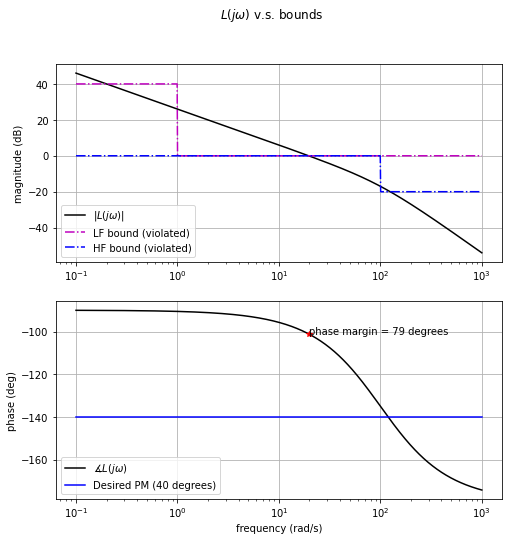

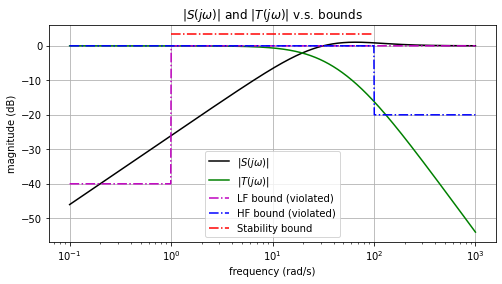

In [135]:
lf = 1
lfb = 40
hf = 100
hfb = -20
pm = 40
lshape(C,P, lf, lfb, hf, hfb,pm )

As explained earlier, loopshaping procedure uses the Bode plot of $L(s)$ as a tool to design a controller, while 
the magnitude plots of $S(s)$ and $T(s)$ are used to demonstrate the relationship between the frequency responses 
and bounds on open-loop and closed-loop systems. 

<p />Notice from the Bode plot of $L(s)$ that, the lead-lag compensator (9) satisfies neither the low-frequency 
nor high-frequency requirements. The curve of $|L(j\omega)|$ must be above the 40 dB bound (magenta dash line) for all 
frequency less than 1 rad/s,  and below -20 dB (blue dash line) for frequency greater than 100 rad/s. The texts in 
legend for LF and HF bounds also indicate 
violation. As a result, the $|S(j\omega)|$ and $|T(j\omega)|$ curves violate the LF and HF bounds, respectively.

<p />So we need to design a new controller, obviously with more LF gain and higher bandwidth, to meet the specs. 
To demonstrate the Bode gain-phase relationship, let’s do something crazy by choosing a controller with only 
proportional gain of 6000. 

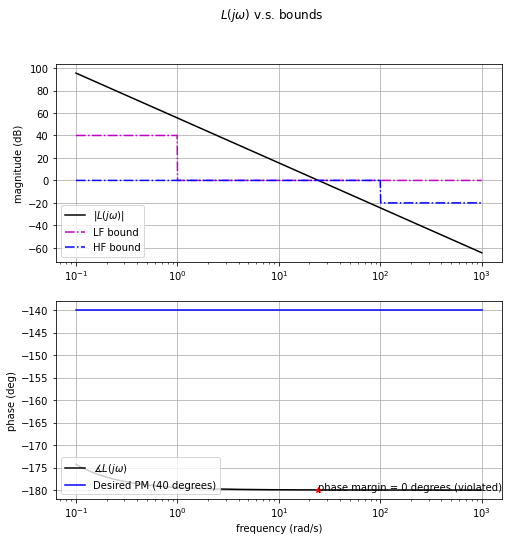

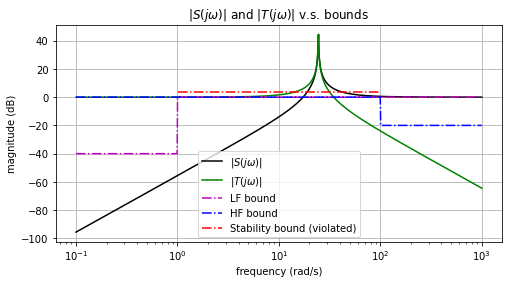

In [136]:
C = 6000
lshape(C,P, lf, lfb, hf, hfb,pm )

The resulting $L(j\omega)$, with its magnitude curve above the LF bound and below the HF bound as desired. Checking 
the phase margin, however, we see that the system now has zero phase margin. The magnitude of $S$ (and $T$) 
also violates the stability bound. Can you explain what happens?

Go back to the Bode gain-phase relationship statement. This static gain controller results in the 
slope of $|L(j\omega)|$ equals -40 dB/decade at crossover frequency.  So its phase is -180 degree; i.e., 
no phase margin left. Perform time-domain simulation to verify that the closed-loop system is unstable. 

<p />So, to design a controller that meets all specs, the curve of  $|L(j\omega)|$   must be above the LF bound,
pass the crossover at slope -20 dB/decade (and maintain this slope for as wide frequency range as possible to 
achieve enough phase margin), and roll off below the HF bound. 
<p />We recommend that the reader should first try shaping the loop by his/her own controller to understand the 
concept. If you don’t succeed or your patience run out, try  this controller 
\begin{equation} 
C(s) = 8000\frac{s + 5}{s + 40}
\end{equation}
<div align="right">(11)</div>

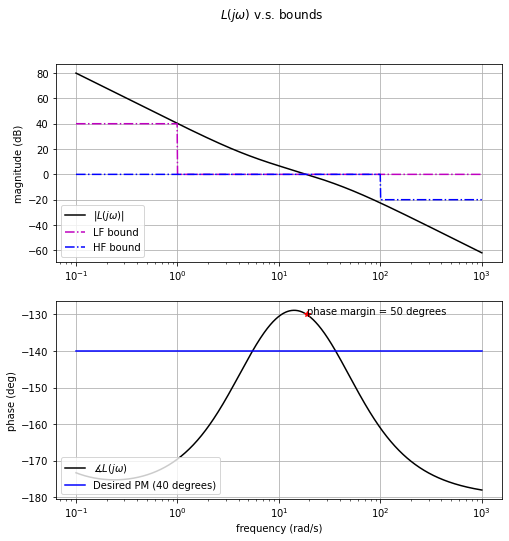

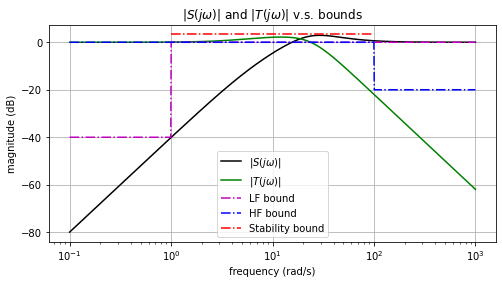

In [137]:
C = 8000*(s+5)/(s+40)
lshape(C,P, lf, lfb, hf, hfb,pm )

The responses versus all stability and performance bounds confirm that this controller meets all the specs. 
The system has phase margin equal 50 degrees. The bandwidth is about 20 rad/s. 

The closed-loop step response is simulated as follows.

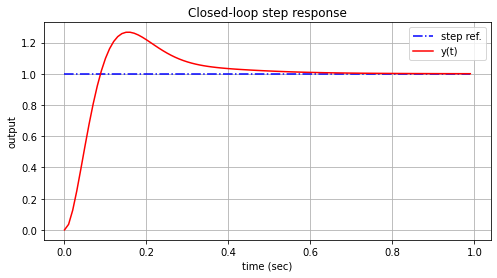

In [138]:
L = C*P
T = L/(1+L)
tvec = np.arange(0,1.0,0.01)
r = np.ones(tvec.shape)
tout, y = ctl.step_response(T,tvec)
plt.figure(figsize=(8,4))
plt.plot(tout,r,'b-.',tout,y,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y(t)'])
plt.title('Closed-loop step response')
plt.show()

To make sure that this design meets all the specification, the disturbance and noise responses in the time-domain 
need to be evaluated. Create a function to plot output response of arbitrary function.

In [139]:
def plot_response(sys,u,t,title):
    tout, y, x = ctl.forced_response(sys,t, u)
    truncated_idx = 150  # get rid of transient
    tout = tout[truncated_idx:]
    u = u[truncated_idx:]
    y = y[truncated_idx:]
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
    fig.suptitle(title)
    ax1.plot(tout,u,'b-')
    ax1.grid(True)
    ax1.set_ylabel('input')
    
    ax2.plot(tout,y,'r-')
    ax2.grid(True)
    ax2.set_ylabel('output')
    ax2.set_xlabel('time (sec)')

    plt.show()    

From the design specifications, the required disturbance attenuation is at least 0.01 for frequency below 1 rad/s.
Since the attenuatiton is the least at $\omega = 1$ rad/s, we use this frequency as our test point.

Recall from (4) that the closed-loop transfer function for the output disturbance response is $S(s)$.
The plot from this cell confirms that the controller meets this attenuation performance.

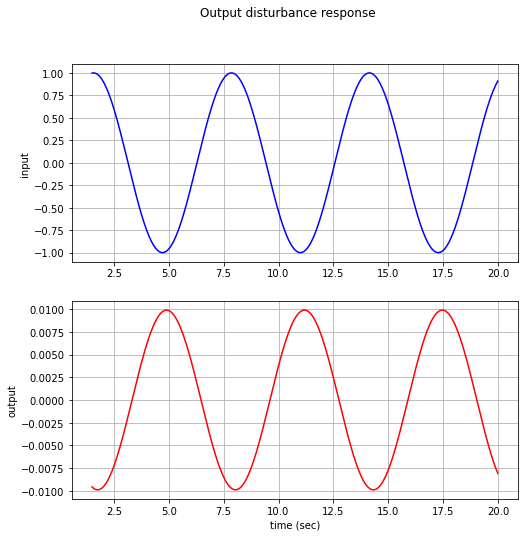

In [140]:
L = C*P
S = 1/(1+L)
t = np.arange(0,20,0.01)
w = 1  # rad/s
u = np.sin(w*t)
plot_response(S,u, t, 'Output disturbance response')

Use the same plot function on the complementary sensitivity $T(s)$ to verify that, with a noise input $u(t)=\sin(\omega t)$ 
where $\omega = 100$ rad/s, the output should swing within $\pm 0.1$ unit.

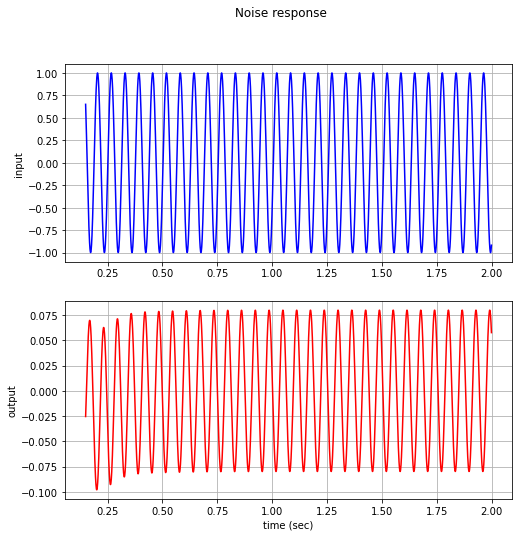

In [141]:
t = np.arange(0,2,0.001)
w = 100  # rad/s
u = np.sin(w*t)
T = L/(1+L)
plot_response(T,u, t, 'Noise response')

<h3>Problems</h3>
<p />1. Show that the relationship between phase margin $\phi$ and the maximum peak of $|S(j\omega)|$ is given by

$$
\max_{\omega} |S(j\omega)| = \frac{\sin \left( \frac{\pi - \phi}{2}\right)}{\sin \phi} 
$$

<p />2. Design a controller to achieve disturbance attenuation performance of 0.001 (-60 dB). Other specs remain the same. 
<p />3. Design a controller to achieve disturbance attenuation of 0.01 (-40 dB) for frequency below 10 rad/s. 
Other specs remain the same. This is a more challenging design. Explain if you are unable to get a controller that 
meets these requirements.

<div align="right">Last update : Feb 12, 2021</div>

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja<br>Copyright 2021</div>